# Missing Data

## Script Setup

In [34]:
# Third-party and standard modules
from typing import Dict, Hashable, Tuple, Union
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from importlib import reload

# User-defined modules.
from modules import dataframe_manip as dfm
from modules import misc, schemas, College1AcPtTimeSeries
# The reload() function is used to update modules after
# changes are made to their files.
dfm = reload(dfm)
misc = reload(misc)
schemas = reload(schemas)
College1AcPtTimeSeries = reload(College1AcPtTimeSeries)

## Script Parameters

In [35]:
filepath = './cisco_wifi_data_until_20190513.csv'
timezone = pytz.timezone('US/Pacific')
schema: schemas.AcPtTimeSeries =\
    College1AcPtTimeSeries.College1AcPtTimeSeries

## Preliminary Data Processing

In [36]:
occ: pd.DataFrame = dfm.csv_to_timeseries_df(
    filepath=filepath, timezone=timezone
)

## Missing Value Visualizations

In [37]:
def na_map_and_barchart(
    timeseries: pd.DataFrame, title: str, showcols: bool = False,
    xlabel: str = 'access points', ylabel: str = 'time',
    figsize: Tuple[Union[int, float], Union[int, float]] = (10, 10)
) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks(timeseries.columns.to_list() if showcols else [])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    timeseries_isna = timeseries.isna()
    timeseries_isna_np = timeseries_isna.to_numpy()
    # Ensure square shape.
    ax.set_aspect(timeseries_isna_np.shape[1] / timeseries_isna_np.shape[0])
    # Show the matrix.
    ax.imshow(timeseries_isna_np, aspect='auto')
    # Make barchart.
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(
        list(range(0, timeseries.shape[1])),
        dfm.column_totals(timeseries.isna())
    )

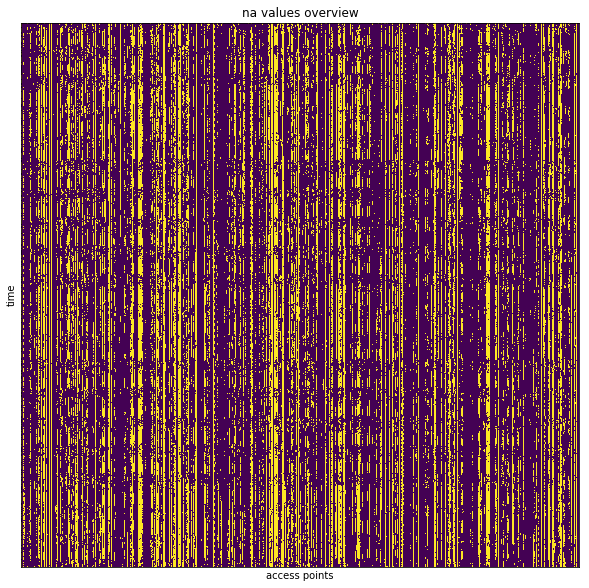

In [ ]:
na_map_and_barchart(timeseries=occ, title='na values overview')

In [ ]:
dfm.fill_intervening_nas(occ, inplace=True, fill_val=0)
na_map_and_barchart(timeseries=occ, title='na values overview')